# Elementy statystyki

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

sns.set_theme(style="whitegrid")

**Zadanie 1**  
Kupiłeś szpulę filamentu o średnicy **1.75 mm** do swojej drukarki 3D. Chcesz zmierzyć, jak bliska jest rzeczywista średnica filamentu deklarowanej wartości. Za pomocą suwmiarki wykonujesz pięć pomiarów w różnych punktach na szpuli:  
`1.78, 1.75, 1.72, 1.74, 1.77`  
Oblicz średnią oraz odchylenie standardowe dla tego zbioru wartości.

In [2]:
pomiary = np.array([1.78, 1.75, 1.72, 1.74, 1.77])

srednia = np.mean(pomiary)
odchylenie = np.std(pomiary, ddof=1)

print(f"Średnia: {srednia}")
print(f"Odchylenie standardowe: {odchylenie}")

Średnia: 1.752
Odchylenie standardowe: 0.023874672772626667


**Zadanie 2**  
Masz wątpliwości, czy filament do drukarki 3D rzeczywiście ma deklarowane $1.75 mm$ średnicy. Za pomocą suwmiarki wykonałeś $34$ pomiary. Średnia próby wynosi $1.715588$, a standardowe odchylenie próby $0.029252$.  
Jaki jest $99$-procentowy przedział ufności dla średniej średnicy filamentu na całej szpuli?

In [3]:
n = 34
srednia_proba = 1.715588
std_proba = 0.029252
poziom_ufnosci = 0.99

se = std_proba / np.sqrt(n)

przedzial_ufnosci = stats.t.interval(poziom_ufnosci, df=n-1, loc=srednia_proba, scale=se)

print(f"99% przedział ufności: {przedzial_ufnosci}")

99% przedział ufności: (np.float64(1.7018760349925839), np.float64(1.729299965007416))


**Zadanie 3:**
Producent twierdzi, że średni czas użytkowania smartfona Z-Phone przez konsumentów wynosi $42$ miesiące z odchyleniem standardowym równym $8$ miesiącom. Jeśli założymy rozkład normalny, jakie będzie prawdopodobieństwo, że losowo wybrany Z-Phone wytrzyma od $20$ do $30$ miesięcy?

In [4]:
mu = 42
sigma = 8

p_20_30 = stats.norm.cdf(30, mu, sigma) - stats.norm.cdf(20, mu, sigma)

print(f"Prawdopodobieństwo, że telefon wytrzyma od 20 do 30 miesięcy: {p_20_30:.4f}")

Prawdopodobieństwo, że telefon wytrzyma od 20 do 30 miesięcy: 0.0638


**Zadanie 4:**
Bazując na danych o pasażerach rejsu statkiem Titanic (dane dostępne w pliku *titanic.csv*), przedstaw następujące dane:

1. Przedstaw na wykresie, jak rozkłada się wiek pasażerów w zależności od klasy, w której podróżowali.
2. Oblicz i przedstaw na wykresie liczbę pasażerów na danym pokładzie. Wyznacz dane na podstawie kolumny `deck`.
3. Przedstaw na wykresie dane dotyczące ewakuacji pasażerów. Z których klas ewakuowano najwięcej pasażerów?
4. Przedstaw, jaki wpływ na ewakuację miał wiek pasażerów. Zaprezentuj na wykresie dane o pasażerach, którzy ocaleli, i tych, którzy nie ocaleli.
5. Sprawdź, czy rozkład wieku pasażerów jest symetryczny. Przedstaw dane dla każdej klasy osobno.
6. Wskaż, czy zachodzą korelacje między wiekiem `age` a przeżyciem `survived` oraz między klasą, którą podróżowali pasażerowie `pclass`, a przeżyciem `survived`.

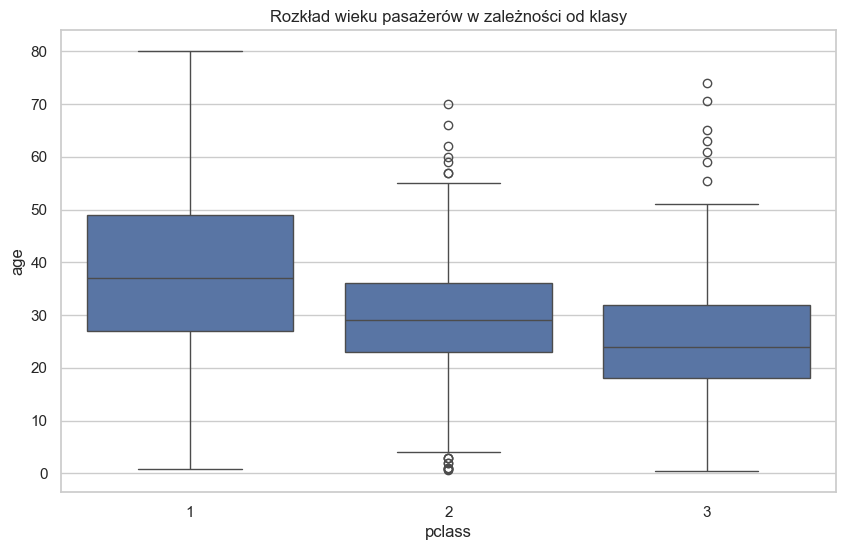

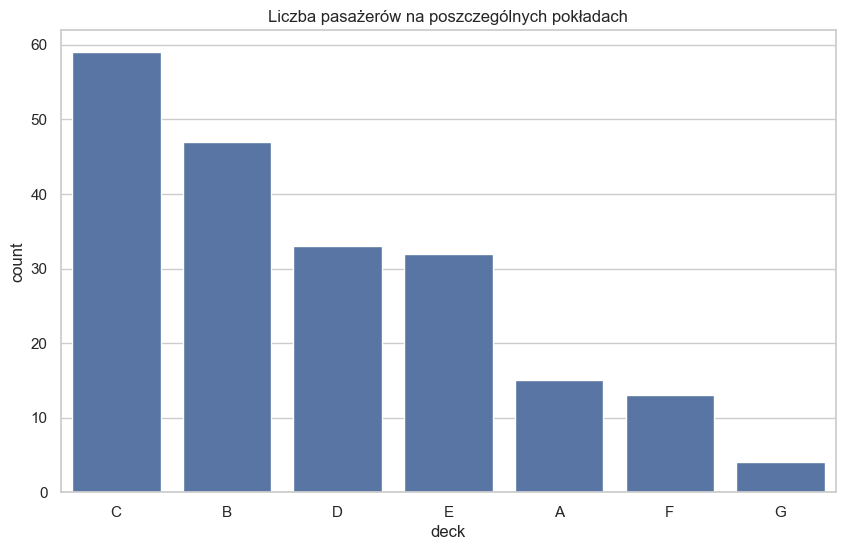

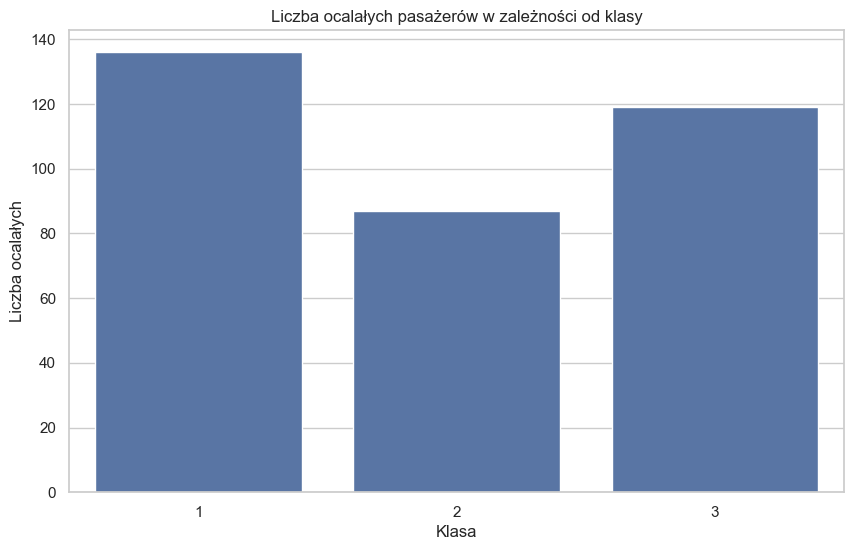

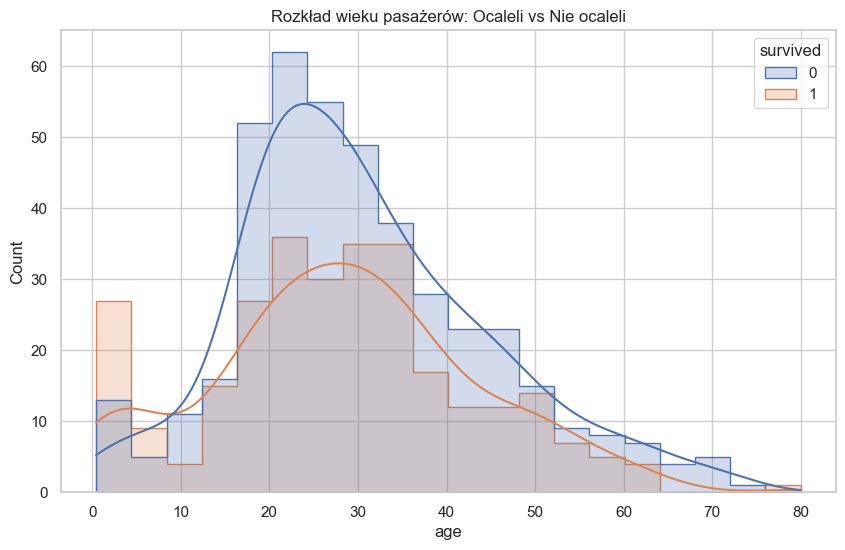

Skośność wieku dla klasy 1: 0.1189


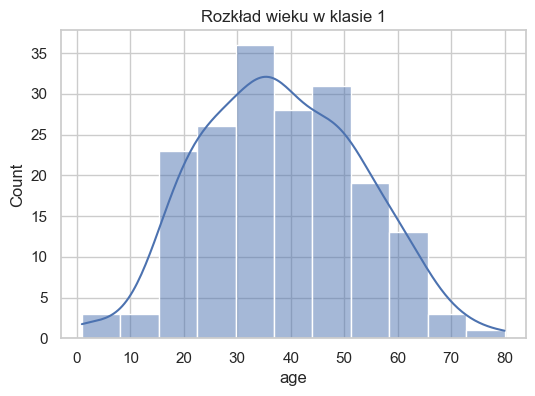

Skośność wieku dla klasy 2: 0.1327


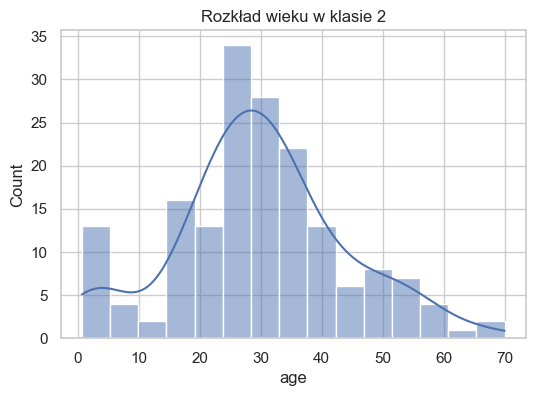

Skośność wieku dla klasy 3: 0.4819


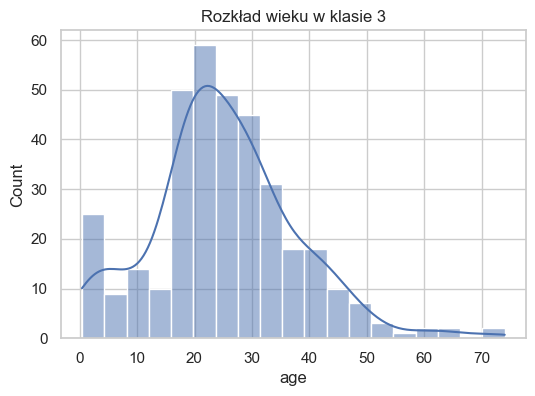

Korelacja wiek - przeżycie: -0.0772
Korelacja klasa - przeżycie: -0.3385


In [5]:
titanic = pd.read_csv('titanic.csv')

plt.figure(figsize=(10, 6))
sns.boxplot(x='pclass', y='age', data=titanic)
plt.title('Rozkład wieku pasażerów w zależności od klasy')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='deck', data=titanic, order=titanic['deck'].value_counts().index)
plt.title('Liczba pasażerów na poszczególnych pokładach')
plt.show()

survived_by_class = titanic[titanic['survived'] == 1]['pclass'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
sns.barplot(x=survived_by_class.index, y=survived_by_class.values)
plt.title('Liczba ocalałych pasażerów w zależności od klasy')
plt.xlabel('Klasa')
plt.ylabel('Liczba ocalałych')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data=titanic, x='age', hue='survived', kde=True, element="step")
plt.title('Rozkład wieku pasażerów: Ocaleli vs Nie ocaleli')
plt.show()

for pclass in sorted(titanic['pclass'].unique()):
    age_class = titanic[titanic['pclass'] == pclass]['age'].dropna()
    skewness = stats.skew(age_class)
    print(f"Skośność wieku dla klasy {pclass}: {skewness:.4f}")
    plt.figure(figsize=(6, 4))
    sns.histplot(age_class, kde=True)
    plt.title(f'Rozkład wieku w klasie {pclass}')
    plt.show()

correlation_age_survived = titanic[['age', 'survived']].corr().iloc[0, 1]
correlation_pclass_survived = titanic[['pclass', 'survived']].corr().iloc[0, 1]

print(f"Korelacja wiek - przeżycie: {correlation_age_survived:.4f}")
print(f"Korelacja klasa - przeżycie: {correlation_pclass_survived:.4f}")

**Zadanie 5**
Dostępne są dane dotyczące sprzedaży produktów w 2023 roku – dane dostępne w pliku *retail_sales_dataset.csv*.

Proszę zapoznać się z danymi i przygotować następujące informacje:
1. Przedstaw na wykresie sumę wszystkich sprzedanych produktów w danym miesiącu z podziałem na kategorię.
2. Oblicz dominantę cenową dla każdej kategorii.
3. Oblicz odchylenie standardowe cen produktów dla każdego miesiąca z podziałem na kategorie i wskaż, w których miesiącach było największe odchylenie standardowe dla każdej kategorii. Wyniki przedstaw na wykresie.
4. Oblicz dla każdego miesiąca średnią oraz medianę cen produktów w każdej kategorii. Dane przedstaw na wykresie.
5. Oblicz kurtozę oraz skośność dla cen produktów dla każdej kategorii.
6. Zakładając przedziały wiekowe: $[18,27]$, $[28,37]$, $[38,47]$, $[48,57]$, $[58,67]$, oblicz zależności między wiekiem `Age` a wydawaną kwotą na produkty w danej kategorii. Dane oblicz dla wszystkich kategorii.

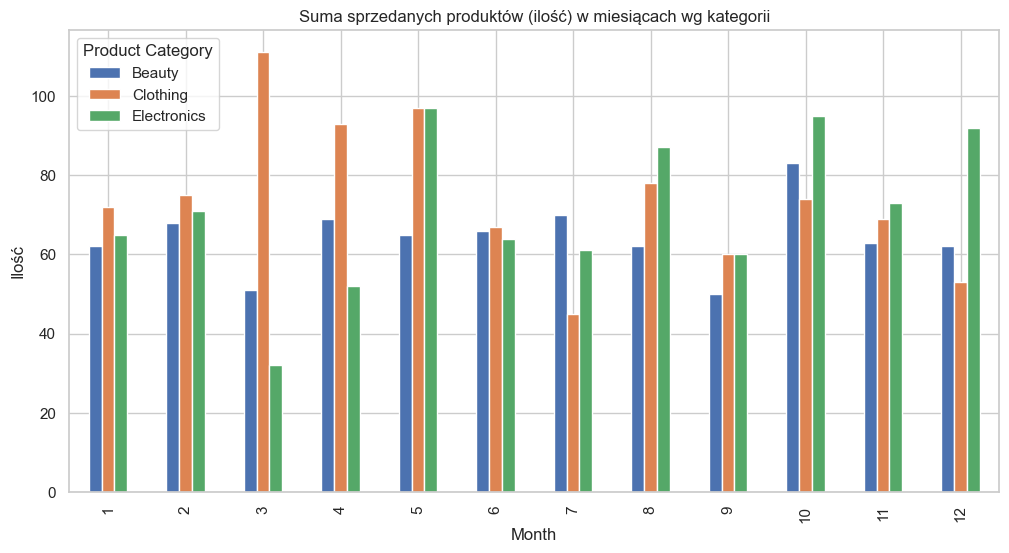

Dominanta cenowa wg kategorii:
Product Category
Beauty         500
Clothing        25
Electronics     25
Name: Price per Unit, dtype: int64


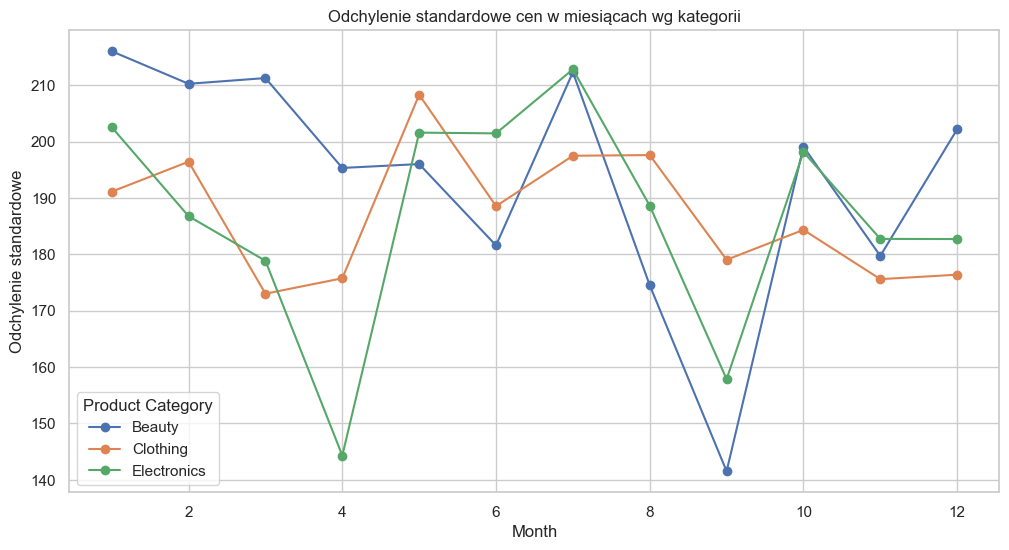


Miesiące z największym odchyleniem standardowym cen:
Product Category
Beauty         1
Clothing       5
Electronics    7
dtype: int32


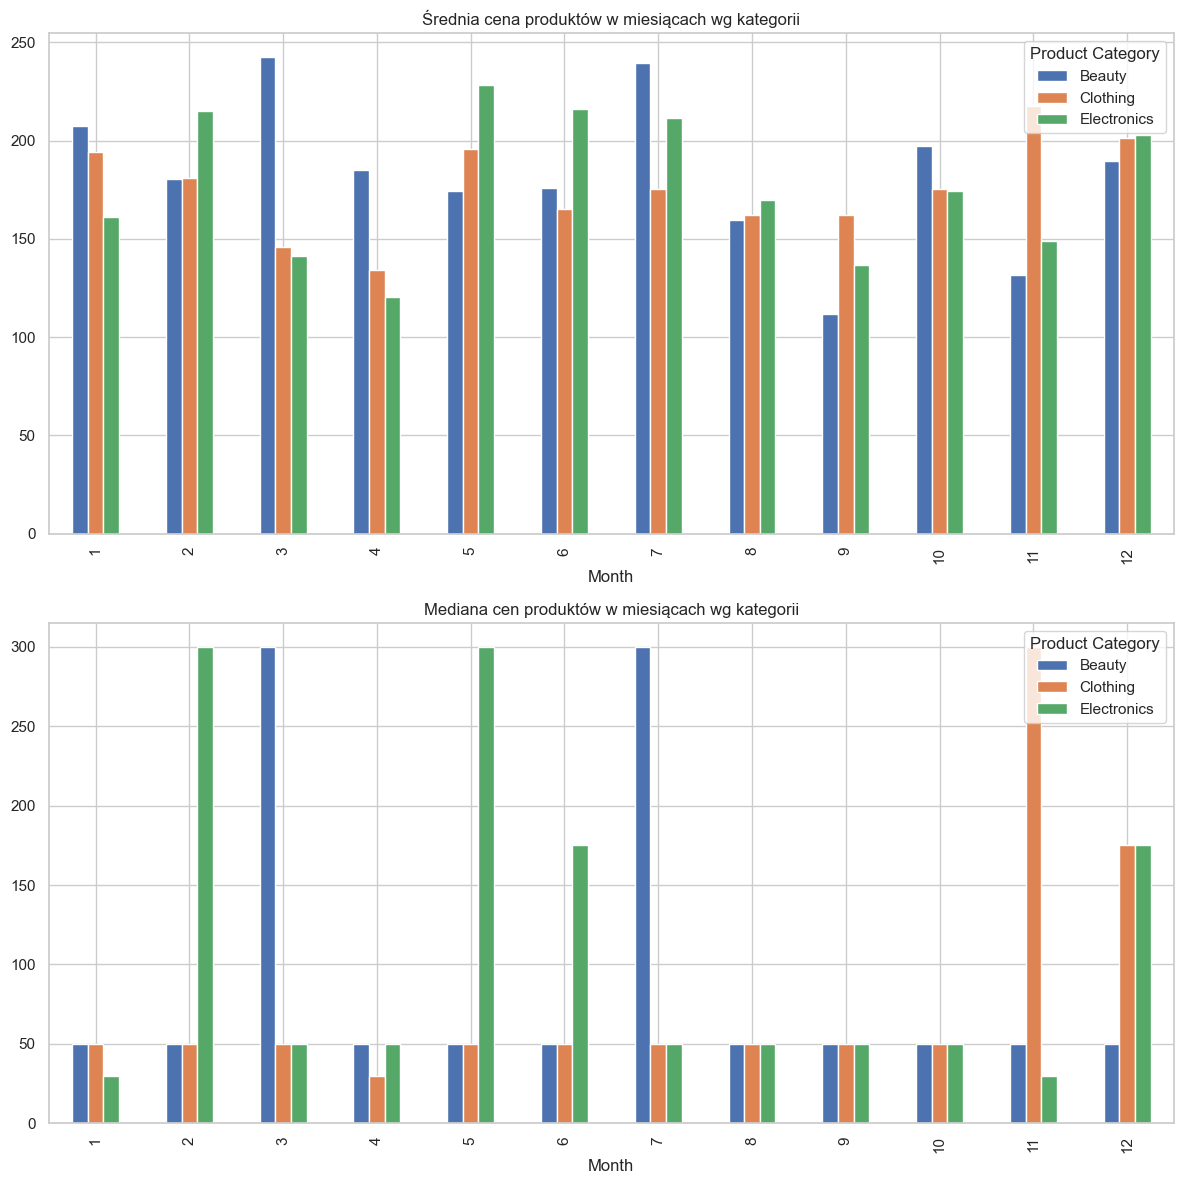


Kurtoza cen wg kategorii:
Product Category
Beauty        -1.227700
Clothing      -1.031399
Electronics   -1.163051
Name: Price per Unit, dtype: float64

Skośność cen wg kategorii:
Product Category
Beauty         0.713909
Clothing       0.788280
Electronics    0.707881
Name: Price per Unit, dtype: float64

Średnia wydawana kwota wg grup wiekowych i kategorii:
Product Category      Beauty    Clothing  Electronics
AgeGroup                                             
18-27             503.333333  563.571429   445.144928
28-37             512.327586  517.608696   475.625000
38-47             534.788732  341.103896   438.851351
48-57             425.737705  407.812500   409.651163
58-67             288.333333  391.363636   572.346939


C:\Users\kacpe\AppData\Local\Temp\ipykernel_12416\1037460885.py:48: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_spending = retail.groupby(['AgeGroup', 'Product Category'])['Total Amount'].mean().unstack()


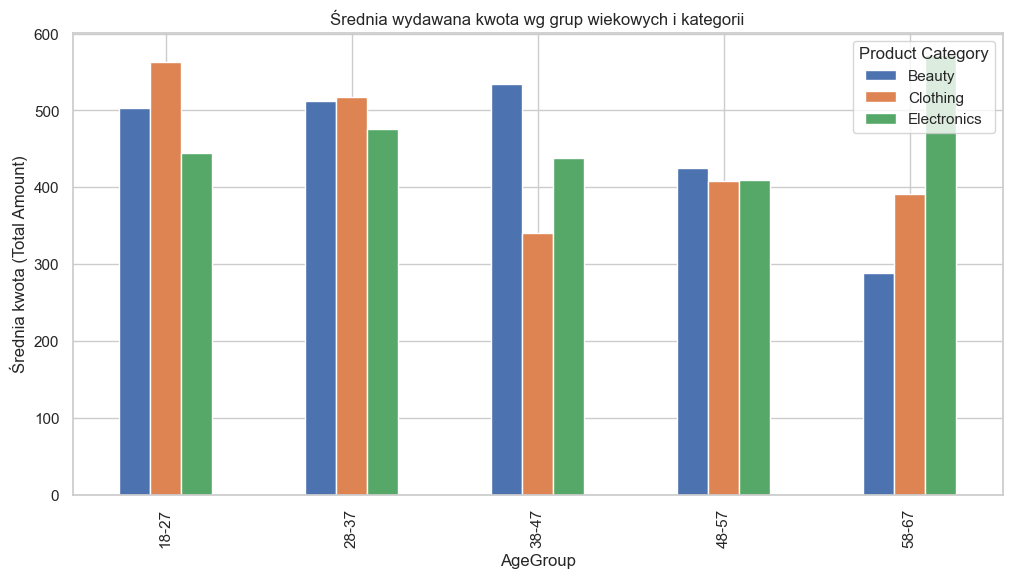

In [6]:
retail = pd.read_csv('retail_sales_dataset.csv')
retail['Date'] = pd.to_datetime(retail['Date'])
retail['Month'] = retail['Date'].dt.month

monthly_sales = retail.groupby(['Month', 'Product Category'])['Quantity'].sum().unstack()
monthly_sales.plot(kind='bar', figsize=(12, 6))
plt.title('Suma sprzedanych produktów (ilość) w miesiącach wg kategorii')
plt.ylabel('Ilość')
plt.show()

mode_price = retail.groupby('Product Category')['Price per Unit'].agg(lambda x: x.mode()[0])
print("Dominanta cenowa wg kategorii:")
print(mode_price)

std_price = retail.groupby(['Month', 'Product Category'])['Price per Unit'].std().unstack()
std_price.plot(kind='line', marker='o', figsize=(12, 6))
plt.title('Odchylenie standardowe cen w miesiącach wg kategorii')
plt.ylabel('Odchylenie standardowe')
plt.show()

max_std_months = std_price.idxmax()
print("\nMiesiące z największym odchyleniem standardowym cen:")
print(max_std_months)

mean_price = retail.groupby(['Month', 'Product Category'])['Price per Unit'].mean().unstack()
median_price = retail.groupby(['Month', 'Product Category'])['Price per Unit'].median().unstack()

fig, axes = plt.subplots(2, 1, figsize=(12, 12))
mean_price.plot(kind='bar', ax=axes[0])
axes[0].set_title('Średnia cena produktów w miesiącach wg kategorii')
median_price.plot(kind='bar', ax=axes[1])
axes[1].set_title('Mediana cen produktów w miesiącach wg kategorii')
plt.tight_layout()
plt.show()

kurtosis = retail.groupby('Product Category')['Price per Unit'].apply(lambda x: x.kurtosis())
skewness = retail.groupby('Product Category')['Price per Unit'].apply(lambda x: x.skew())

print("\nKurtoza cen wg kategorii:")
print(kurtosis)
print("\nSkośność cen wg kategorii:")
print(skewness)

bins = [18, 28, 38, 48, 58, 68]
bins = [18, 28, 38, 48, 58, 68]
labels = ['18-27', '28-37', '38-47', '48-57', '58-67']
retail['AgeGroup'] = pd.cut(retail['Age'], bins=bins, labels=labels, right=False)
age_spending = retail.groupby(['AgeGroup', 'Product Category'])['Total Amount'].mean().unstack()
print("\nŚrednia wydawana kwota wg grup wiekowych i kategorii:")
print(age_spending)

age_spending.plot(kind='bar', figsize=(12, 6))
plt.title('Średnia wydawana kwota wg grup wiekowych i kategorii')
plt.ylabel('Średnia kwota (Total Amount)')
plt.show()

**Zadanie 6**  
Utwórz ramkę danych `hr` na podstawie pliku *HR.csv*. Poszczególne kolumny oznaczają:  
* `satisfaction_level` - poziom satysfakcji pracownika w skali od $0$ do $1$;  
* `last_evaluation` - ocena pracownika w skali od $0$ do $1$;  
* `number_project` - liczba projektów, w które zaangażowany był dany pracownik;  
* `average_montly_hours` - średnia liczba godzin w miesiącu spędzona w biurze;  
* `time_spend_company` - liczba lat spędzonych w firmie;  
* `work_accident` - informacja, czy pracownik miał wypadek przy pracy (`1` - tak, `0` - nie);  
* `left` - informacja, czy pracownik się zwolnił (`1` - tak, `0` - nie);  
* `promotion_last_5years` - informacja, czy pracownik otrzymał awans w ciągu ostatnich pięciu lat (`1` - tak, `0` - nie);  
* `sales` - dział zatrudnienia;  
* `salary` - wysokość zarobków (grupy).  

Wykonaj następujące polecenia:  
1. Zmień nazwę kolumny `sales` na `department` w ramce `hr`.  
2. Jaka jest minimalna i maksymalna ocena poziomu satysfakcji pracownika?  
3. Jaka jest średnia ocena pracownika, a jaka mediana?  
4. Ile jest działów w firmie?  
5. Ile jest/było pracowników w poszczególnych działach? Sporządź odpowiedni wykres słupkowy.  
6. Ilu pracowników się zwolniło? Ile procent pracowników zwolniło się z danego działu?  
7. Ilu pracowników dostało awans? Ile procent pracowników dostało awans z danego działu?  
8. Ile jest grup płacowych? Sporządź wykres słupkowy prezentujący liczbę pracowników z każdej grupy płacowej w każdym dziale.  
9. Wyznacz macierz korelacji dla kolumn ramki `hr` z uwzględnieniem zarobków (w tym celu dokonaj odpowiedniej konwersji danych kategorycznych na dane numeryczne). Utwórz odpowiednią mapę ciepła. Zrób to samo, ale osobno dla pracowników, którzy się zwolnili, oraz tych, którzy zostali.  
10. Zbadaj, czy istnieje związek między poziomem satysfakcji a tym, czy pracownik opuścił firmę. Wykonaj to na trzy sposoby:  
    - zbadaj korelację między poziomem satysfakcji a decyzją o odejściu;  
    - wykonaj wizualizację zależności między poziomem satysfakcji a tym, czy pracownik opuścił firmę, za pomocą wykresu pudełkowego;  
    - za pomocą testu t-Studenta oceń, czy istnieją statystycznie istotne różnice w poziomie satysfakcji między pracownikami, którzy się zwolnili, a tymi, którzy zostali.  
11. Czy wynagrodzenie wpływa na rotację pracowników? Sprawdź to na trzy sposoby:  
    - za pomocą wizualizacji rozkładu wynagrodzenia w zależności od rotacji (wykres słupkowy);  
    - za pomocą obliczania procentu pracowników, którzy odeszli, w różnych grupach płacowych;  
    - za pomocą testu chi-kwadrat.  
12. Zbadaj, czy pracownicy, którzy otrzymali awans, mają wyższy poziom satysfakcji. Sprawdź to na dwa sposoby:  
    - za pomocą wykresu pudełkowego poziomu satysfakcji w zależności od tego, czy pracownik otrzymał awans;  
    - za pomocą testu t-Studenta - porównanie poziomu satysfakcji między pracownikami, którzy otrzymali awans, a tymi, którzy nie otrzymali.  
13. Przedstaw na wykresie słupkowym liczbę pracowników, którzy się zwolnili i którzy się nie zwolnili, w zależności od liczby projektów.  
14. Dokonaj kategoryzacji oceny poziomu satysfakcji na 6 przedziałów: $[0, 0.2, 0.4, 0.6, 0.8, 0.9, 1.0]$ nazwanych odpowiednio: `Lowest`, `Low`, `Average`, `Good`, `High`, `Highest`. Przedstaw na wykresie słupkowym liczbę pracowników, którzy się zwolnili i którzy się nie zwolnili, w zależności od skategoryzowanej oceny poziomu satysfakcji.

Minimalna satysfakcja: 0.09
Maksymalna satysfakcja: 1.0
Średnia ocena: 0.7161017401160078
Mediana oceny: 0.72
Liczba działów: 10


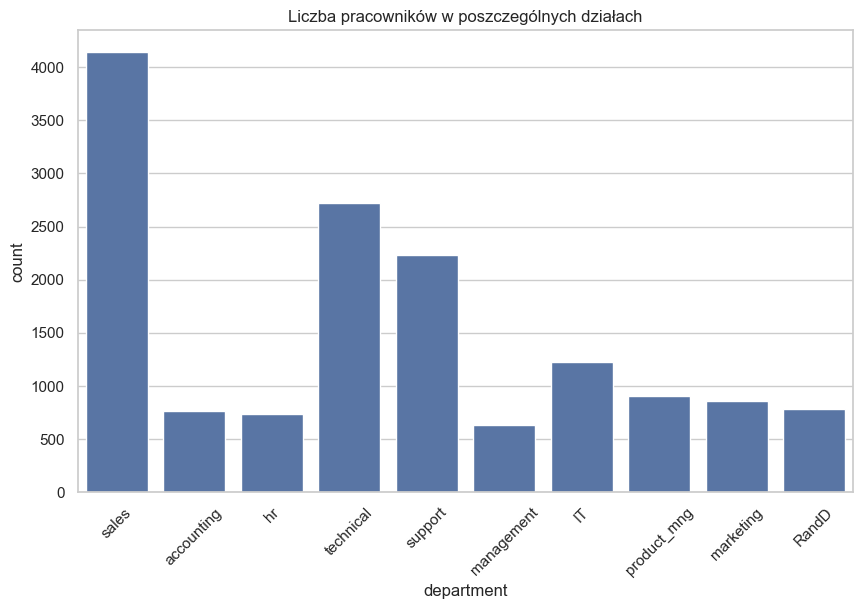

Liczba pracowników, którzy się zwolnili: 3571

Procent zwolnień w działach:
department
IT             22.249389
RandD          15.374841
accounting     26.597132
hr             29.093369
management     14.444444
marketing      23.659674
product_mng    21.951220
sales          24.492754
support        24.899058
technical      25.625000
Name: left, dtype: float64

Liczba pracowników z awansem: 319

Procent awansów w działach:
department
IT              0.244499
RandD           3.430750
accounting      1.825293
hr              2.029770
management     10.952381
marketing       5.011655
product_mng     0.000000
sales           2.415459
support         0.897263
technical       1.029412
Name: promotion_last_5years, dtype: float64

Liczba grup płacowych: 3


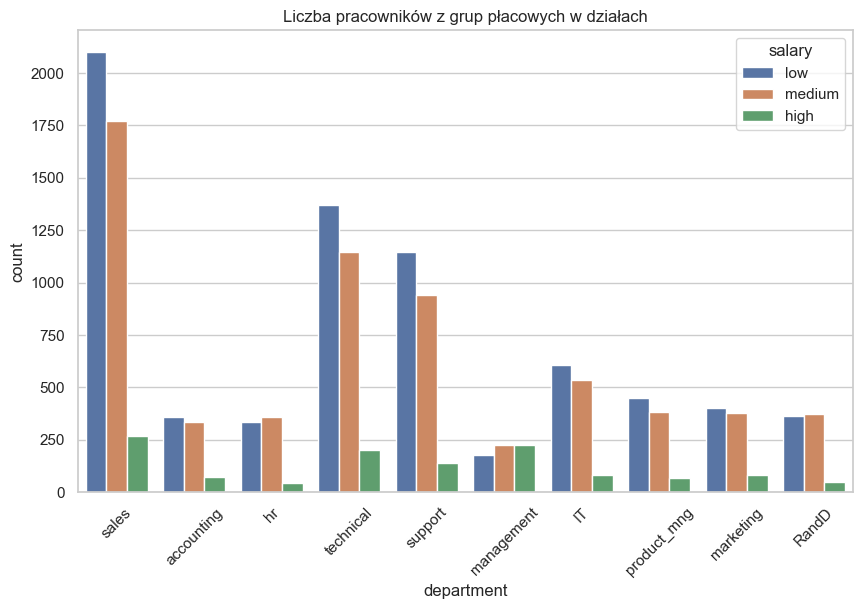

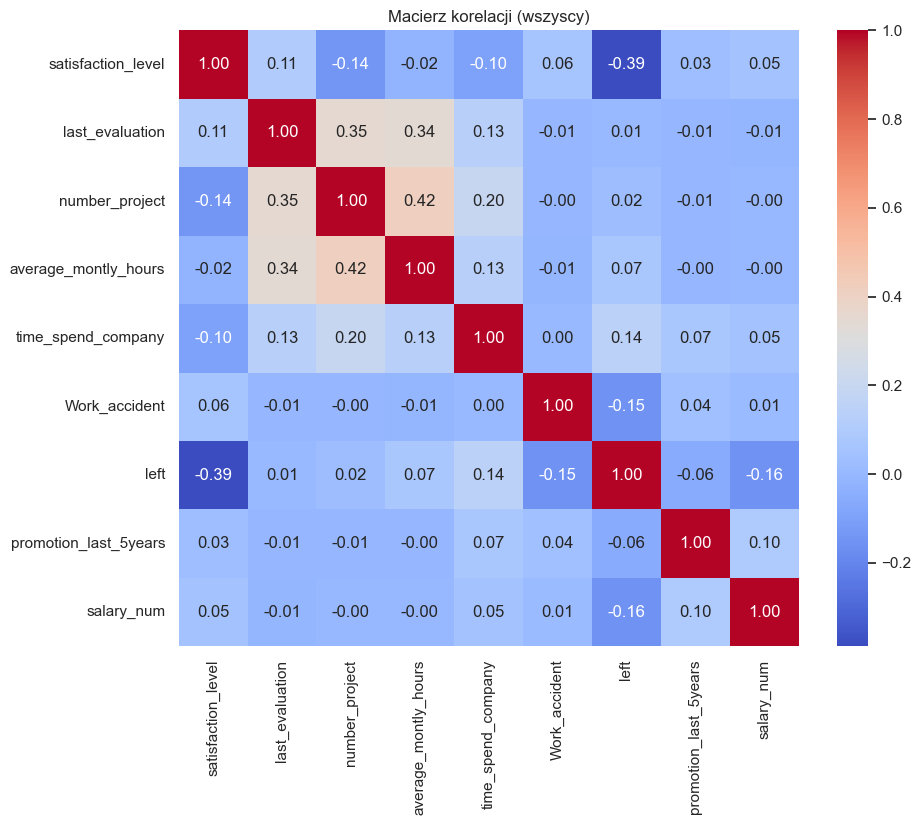

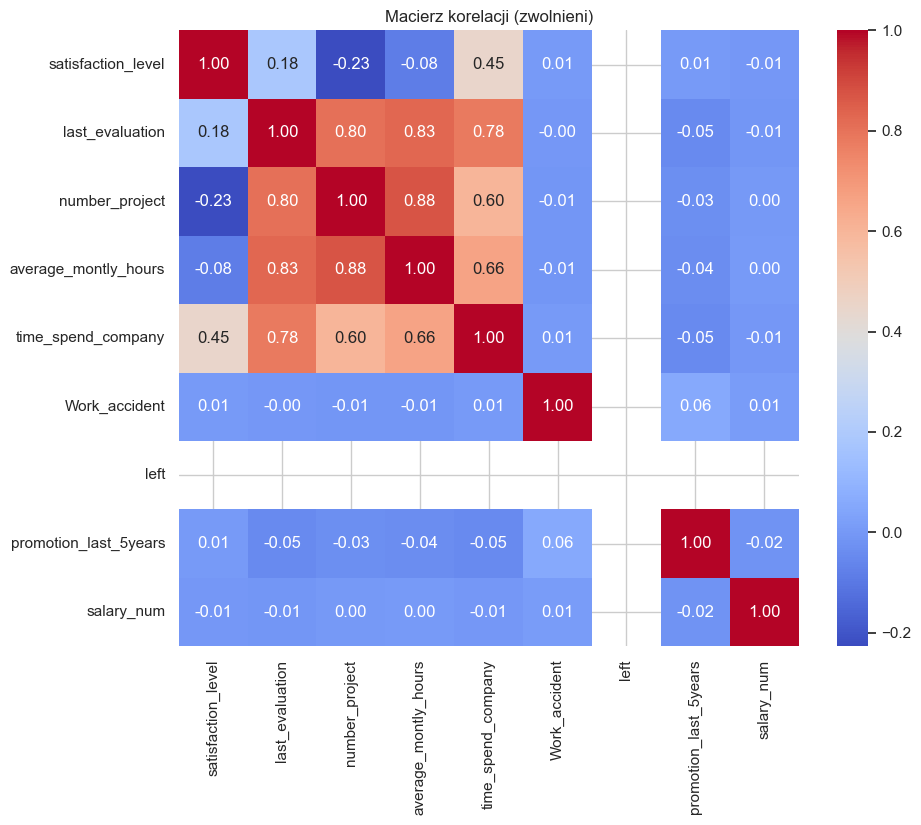

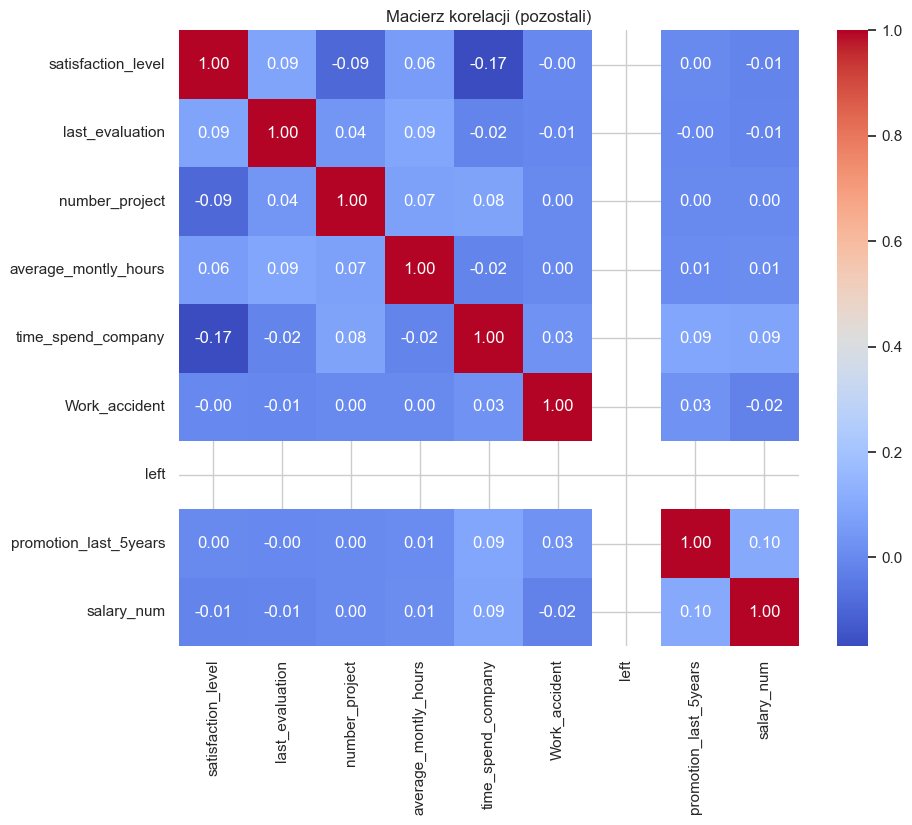


Korelacja satysfakcja - odejście: -0.38837498342411436


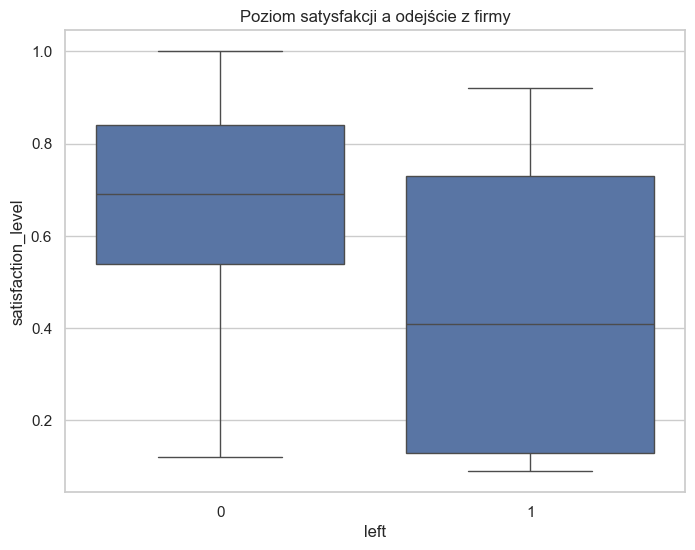

Test t-Studenta (satysfakcja): t=-51.61280155890104, p=0.0


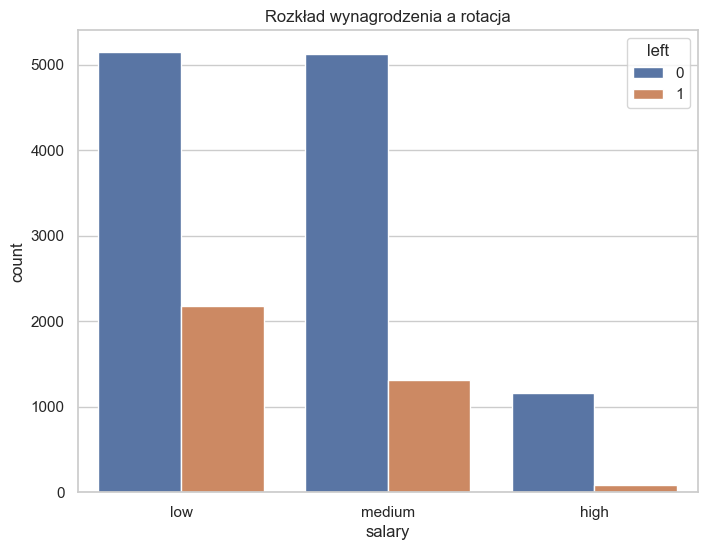


Procent odejść w grupach płacowych:
salary
high       6.628941
low       29.688354
medium    20.431275
Name: left, dtype: float64
Test chi-kwadrat (wynagrodzenie vs odejście): chi2=381.22504706621066, p=1.652086749295958e-83


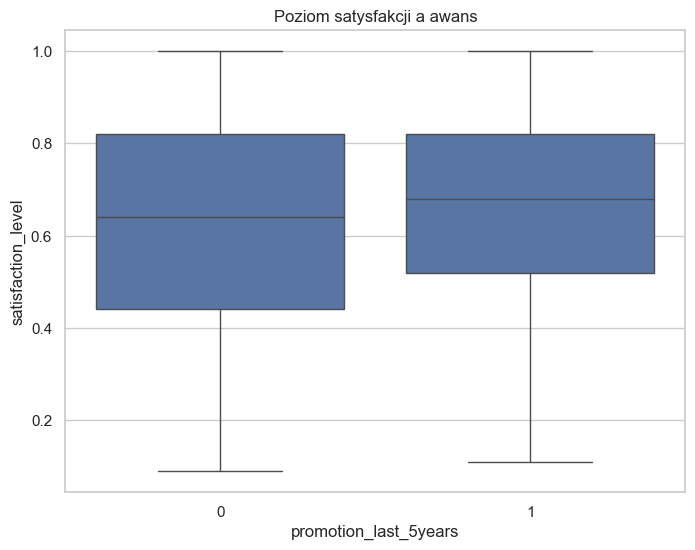

Test t-Studenta (satysfakcja vs awans): t=3.136696791785673, p=0.0017119316267239443


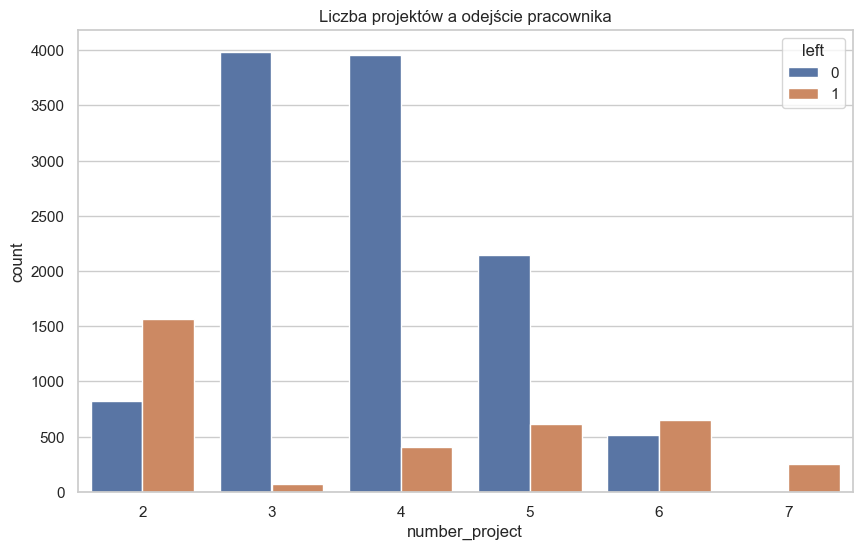

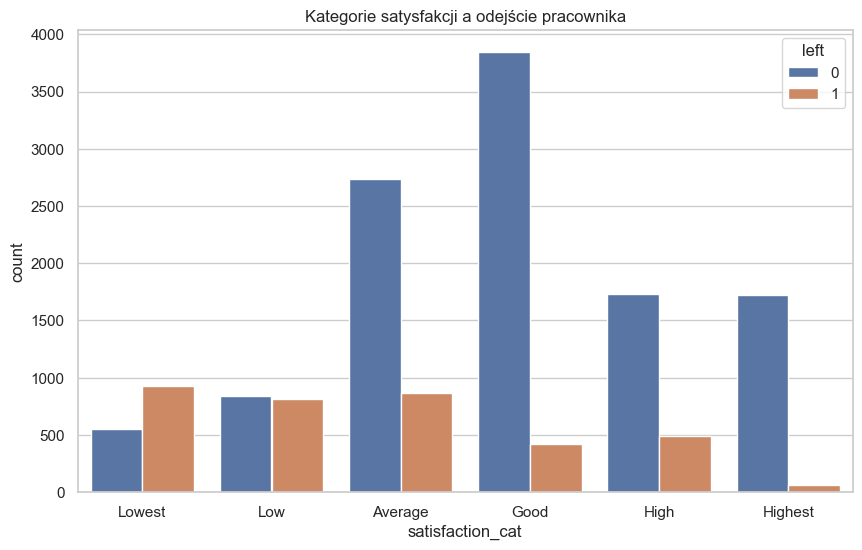

In [8]:
# Wczytanie danych
hr = pd.read_csv('HR.csv')

# 1. Zmiana nazwy kolumny
hr = hr.rename(columns={'sales': 'department'})

# 2. Min i max satisfaction_level
min_sat = hr['satisfaction_level'].min()
max_sat = hr['satisfaction_level'].max()
print(f"Minimalna satysfakcja: {min_sat}")
print(f"Maksymalna satysfakcja: {max_sat}")

# 3. Średnia i mediana last_evaluation (ocena pracownika)
mean_eval = hr['last_evaluation'].mean()
median_eval = hr['last_evaluation'].median()
print(f"Średnia ocena: {mean_eval}")
print(f"Mediana oceny: {median_eval}")

# 4. Liczba działów
num_depts = hr['department'].nunique()
print(f"Liczba działów: {num_depts}")

# 5. Liczba pracowników w działach
plt.figure(figsize=(10, 6))
sns.countplot(x='department', data=hr)
plt.title('Liczba pracowników w poszczególnych działach')
plt.xticks(rotation=45)
plt.show()

# 6. Zwolnienia
num_left = hr['left'].sum()
print(f"Liczba pracowników, którzy się zwolnili: {num_left}")

left_per_dept = hr.groupby('department')['left'].mean() * 100
print("\nProcent zwolnień w działach:")
print(left_per_dept)

# 7. Awanse
num_promoted = hr['promotion_last_5years'].sum()
print(f"\nLiczba pracowników z awansem: {num_promoted}")

promoted_per_dept = hr.groupby('department')['promotion_last_5years'].mean() * 100
print("\nProcent awansów w działach:")
print(promoted_per_dept)

# 8. Grupy płacowe
num_salary_groups = hr['salary'].nunique()
print(f"\nLiczba grup płacowych: {num_salary_groups}")

plt.figure(figsize=(10, 6))
sns.countplot(x='department', hue='salary', data=hr)
plt.title('Liczba pracowników z grup płacowych w działach')
plt.xticks(rotation=45)
plt.show()

# 9. Macierz korelacji
# Konwersja salary na numeryczne
salary_map = {'low': 1, 'medium': 2, 'high': 3}
hr['salary_num'] = hr['salary'].map(salary_map)

# Wybór kolumn numerycznych do korelacji
cols_corr = ['satisfaction_level', 'last_evaluation', 'number_project', 
             'average_montly_hours', 'time_spend_company', 'Work_accident', 
             'left', 'promotion_last_5years', 'salary_num']

plt.figure(figsize=(10, 8))
sns.heatmap(hr[cols_corr].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Macierz korelacji (wszyscy)')
plt.show()

# Osobno dla zwolnionych i tych co zostali
plt.figure(figsize=(10, 8))
sns.heatmap(hr[hr['left']==1][cols_corr].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Macierz korelacji (zwolnieni)')
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(hr[hr['left']==0][cols_corr].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Macierz korelacji (pozostali)')
plt.show()

# 10. Związek satysfakcja - odejście
# Korelacja
corr_sat_left = hr['satisfaction_level'].corr(hr['left'])
print(f"\nKorelacja satysfakcja - odejście: {corr_sat_left}")

# Wykres pudełkowy
plt.figure(figsize=(8, 6))
sns.boxplot(x='left', y='satisfaction_level', data=hr)
plt.title('Poziom satysfakcji a odejście z firmy')
plt.show()

# Test t-Studenta
sat_left = hr[hr['left']==1]['satisfaction_level']
sat_stayed = hr[hr['left']==0]['satisfaction_level']
t_stat, p_val = stats.ttest_ind(sat_left, sat_stayed)
print(f"Test t-Studenta (satysfakcja): t={t_stat}, p={p_val}")

# 11. Wynagrodzenie a rotacja
# Wykres
plt.figure(figsize=(8, 6))
sns.countplot(x='salary', hue='left', data=hr, order=['low', 'medium', 'high'])
plt.title('Rozkład wynagrodzenia a rotacja')
plt.show()

# Procent odejść w grupach płacowych
left_per_salary = hr.groupby('salary')['left'].mean() * 100
print("\nProcent odejść w grupach płacowych:")
print(left_per_salary)

# Test chi-kwadrat
contingency_table = pd.crosstab(hr['salary'], hr['left'])
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
print(f"Test chi-kwadrat (wynagrodzenie vs odejście): chi2={chi2}, p={p}")

# 12. Awans a satysfakcja
# Wykres pudełkowy
plt.figure(figsize=(8, 6))
sns.boxplot(x='promotion_last_5years', y='satisfaction_level', data=hr)
plt.title('Poziom satysfakcji a awans')
plt.show()

# Test t-Studenta
sat_promo = hr[hr['promotion_last_5years']==1]['satisfaction_level']
sat_no_promo = hr[hr['promotion_last_5years']==0]['satisfaction_level']
t_stat_promo, p_val_promo = stats.ttest_ind(sat_promo, sat_no_promo)
print(f"Test t-Studenta (satysfakcja vs awans): t={t_stat_promo}, p={p_val_promo}")

# 13. Liczba projektów a odejście
plt.figure(figsize=(10, 6))
sns.countplot(x='number_project', hue='left', data=hr)
plt.title('Liczba projektów a odejście pracownika')
plt.show()

# 14. Kategoryzacja satysfakcji
bins = [0, 0.2, 0.4, 0.6, 0.8, 0.9, 1.0]
labels = ['Lowest', 'Low', 'Average', 'Good', 'High', 'Highest']
hr['satisfaction_cat'] = pd.cut(hr['satisfaction_level'], bins=bins, labels=labels, include_lowest=True)

plt.figure(figsize=(10, 6))
sns.countplot(x='satisfaction_cat', hue='left', data=hr)
plt.title('Kategorie satysfakcji a odejście pracownika')
plt.show()